In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn import datasets

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
dataset = datasets.load_iris()

In [8]:
dataset.keys()

dict_keys(['feature_names', 'data', 'target', 'DESCR', 'target_names'])

In [9]:
print(dataset.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [10]:
dataset.data.shape

(150, 4)

In [11]:
dataset_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [12]:
dataset_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
dataset_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
dataset_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

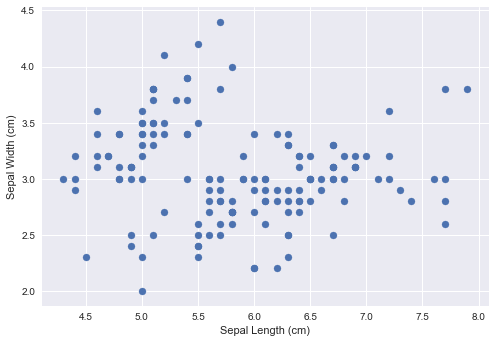

In [15]:
plt.scatter(dataset_df['sepal length (cm)'], dataset_df['sepal width (cm)'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

In [16]:
dataset_df['class'] = dataset.target_names[dataset.target]

In [17]:
dataset_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


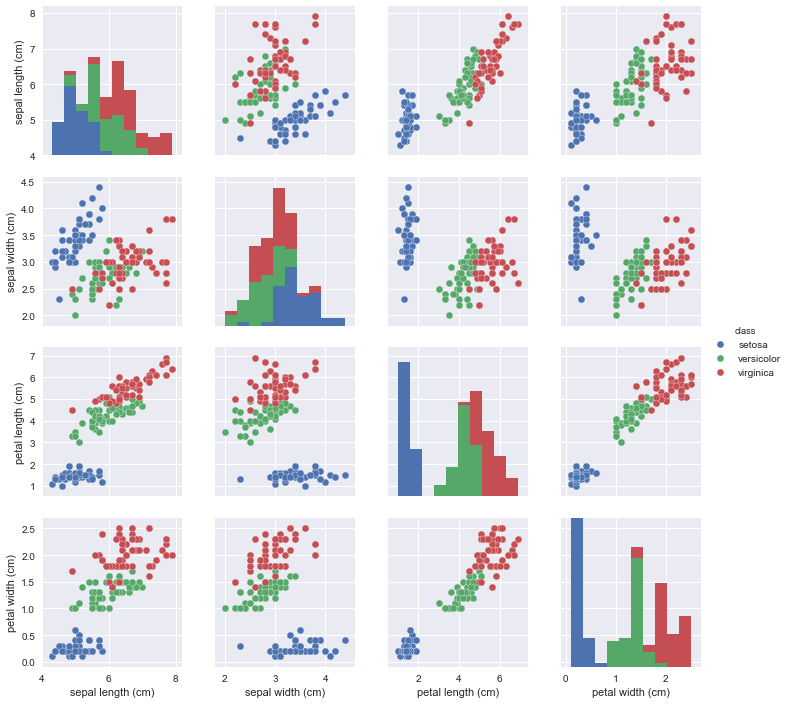

In [18]:
sns.pairplot(dataset_df, hue='class')

In [19]:
dataset_df.loc[4]

sepal length (cm)         5
sepal width (cm)        3.6
petal length (cm)       1.4
petal width (cm)        0.2
class                setosa
Name: 4, dtype: object

In [20]:
dataset_df.iloc[5:7,1:3]

,sepal width (cm),petal length (cm)
5,3.9,1.7
6,3.4,1.4


In [21]:
dataset_df.ix[[5,7]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
5,5.4,3.9,1.7,0.4,setosa
7,5.0,3.4,1.5,0.2,setosa


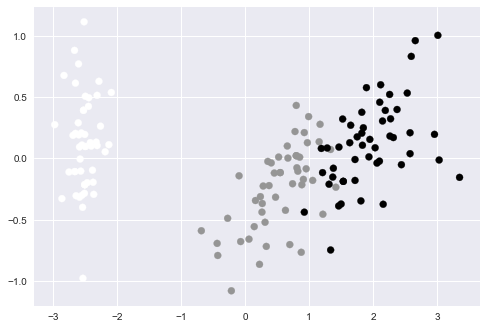

In [22]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(dataset_df.iloc[:,1:4])
X = pca.transform(dataset_df.iloc[:,1:4])
plt.scatter(X[:,0], X[:,1], c=dataset.target) 